# 데이터 전처리 (파이선 머신러닝 완벽가이드 p.116-144)

## ✔️데이터 인코딩

##### 머신러닝을 위한 대표적인 인코딩 방식은 레이블 인코딩(Label encoding)과 원-핫 인코딩(One Hot encoding)이 있다.

### 레이블 인코딩

In [2]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


- TV는 0, 냉장고는 1, 전자레인지는 4, 컴퓨터는 5, 선풍기는 3, 믹서는 2로 변환됨. 위 예제의 경우 데이터가 작아서 문자열 값이 어떤 숫자값으로 인코딩됐는지 쉽게 알 수 있지만, 많은 경우 이를 알지 못함. 이 경우 LabelEncoder 객체의 classes_속성값으로 확인함!

In [3]:
print('인코딩 클래스:', encoder.classes_) # 0부터 순서대로 출력

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [4]:
print('디코딩 원본값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


- 레이블 인코딩의 문제점: 몇몇 ML 알고리즘에는 이를 적용할 경우 예측 성능이 떨어지는 경우가 발생할 수 있음. 이는 숫자 값의 경우 크고 작음에 대한 특성이 작용하기 때문. 즉, 냉장고가 1, 믹서가 2로 변환되면, 1보다 2가 더 큰 값이므로 특정 ML 알고리즘에서 가중치가 더 부여되거나 더 중요하게 인식할 가능성이 발생함
- 이러한 문제를 해결하기 위해 원-핫-인코딩을 활용함!

### 원-핫-인코딩(One-Hot-Encoding)

행 형태로 돼 있는 피처의 고유 값을 열 형태로 차원을 변환한 뒤, 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식임

In [5]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터',' 선풍기',' 선풍기', '믹서', '믹서']

# 2차원 ndarray로 변환합니다
items = np.array(items).reshape(-1,1)

# 원-핫-인코딩을 적용합니다
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


- 판다스에는 원-핫 인코딩을 더 쉽게 지원하는 API가 있다.

In [6]:
import pandas as pd

df=pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


##✔️피처 스케일링과 정규화

- 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링이라고 함. 대표적인 방법으로 표준화와 정규화가 있음.
- 표준화: 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규분포를 가진 값으로 변환
- 정규화: 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념 (사이킷런의 전처리에서 제공하는 Normalizer 모듈과 일반적인 정규화는 공식에서 약간의 차이 있음)

### StandardScaler

- 표준화를 쉽게 지원하기 위한 클래스
- 특히 사이킷런에서 구현한 RBF 커널을 이용하는 서포트 벡터 머신이나 선형 회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현됐기 때문에 사전에 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소가 될 수 있음

In [7]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 세트를 로딩하고 DataFrame으로 변환합니다
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature들의 평균 값')
print(iris_df.mean())
print('\nfeature들의 분산 값')
print(iris_df.var())

feature들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [8]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환, fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 스케일 변환된 데이터세트가 Numpy ndarray로 변환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 평균 값')
print(iris_df_scaled.mean())
print('feature들의 분산 값')
print(iris_df_scaled.var())

feature들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
feature들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


- 모든 칼럼 값의 평균이 0에 아주 가까운 값으로, 그리고 분산은 1에 아주 가까운 값으로 변환됐음을 알 수 있음

###MinMaxScaler

- 정규화를 시켜주는 scaler
- 데이터값을 0과 1 사이의 범위 값으로 변환 (음수 값이 있으면 -1에서 1값으로 변환)

In [9]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환, fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform 시 스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('feature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


- 모든 피처에 0에서 1 사이의 값으로 변환되는 스케일링이 적용됐음을 알 수 있음

### 학습데이터와 테스트데이터의 스케일링 변환 시 유의점

In [10]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler 클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

- 학습 데이터 세트부터 변환해보자

In [11]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10 -> 1로 변환됨
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


- 이제 테스트 데이터를 변환해보자

In [12]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


- 문제점: 출력 결과를 확인하면 학습 데이터와 테스트 데이터의 스케일링이 맞지 않음을 알 수 있음. (학습 데이터는 1/10로, 테스트 데이터는 1/5로 스케일링됨) 이렇게 되면 학습 데이터와 테스트 데이터의 서로 다른 원본값이 동일한 값으로 변환되는 결과가 초래됨.
- 해결책: 테스트 데이터의 1 값은 학습 데이터와 동일하게 0.1 값으로 변환돼야 함. 따라서 테스트 데이터에 다시 fit()을 적용해서는 안 되며 학습 데이터로 이미 fit()이 적용된 Scaler 객체를 이용해 transform()으로 변환해야 함

In [13]:
scaler = MinMaxScaler()
scaler.fit(train_array) # 최솟값이 0, 최댓값이 10으로 설정
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform()만으로 변환해야 함
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


## ⛴️사이킷런으로 수행하는 타이타닉 생존자 예측

- Passengerid： 탑승자 데이터 일련번호
- survived： 생존 여부, 0 = 사망, 1 = 생존
- pclass： 티켓의선실 등급, 1 = 일등석,2 = 이등석,3 = 삼등석
- sex： 탑승자 성별
- name： 탑승자 이름
- Age： 탑승자 나이
- sibsp： 같이 탑승한 형제자매 또는 배우자 인원수
- parch: 같이 탑승한 부모님 또는 어린이 인원수
- ticket: 티켓 번호
- fare： 요금
- cabin： 선실번호
-embarked： 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [15]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [16]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [17]:
print('Sex 값 분포:\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포: \n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포: \n', titanic_df['Embarked'].value_counts())

Sex 값 분포:
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포: 
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포: 
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


- Sex, Embarked 값은 별 문제없으나, Cabin의 경우 N이 687건으로 가장 많은 것도 특이하지만, 속성값이 제대로 정리되지 않은 것 같음. 예를 들어 'C23 C25 C27'과 같이 여러 Cabin이 한꺼번에 표기된 Cabin 값이 4건이 됨. Cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫번째 알파벳이 중요해보임

In [18]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


##### 성별이 생존 확률에 어떤 영향을 미쳤는지, 성별에 따른 생존자 수 비교

In [19]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

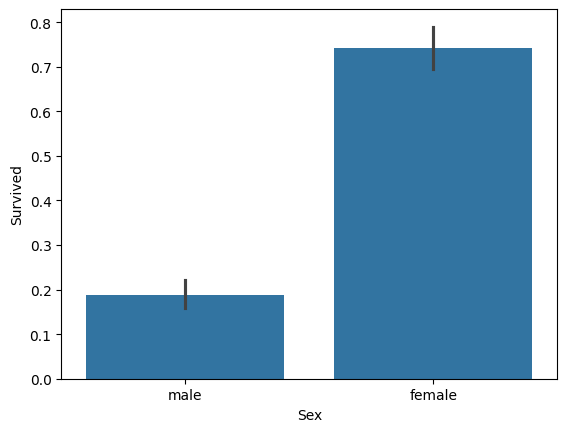

In [20]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

##### 부자와 가난한 사람 간 생존 확률 비교. 부를 측정할 수 있는 속성으로 적당한 객실등급 별 생존확률 확인하기

<Axes: xlabel='Pclass', ylabel='Survived'>

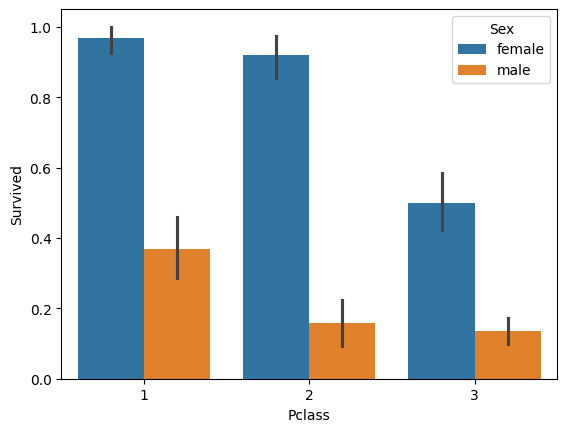

In [21]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

##### Age에 따른 생존 확률 비교 - Age의 경우 값 종류가 많으므로 범위별로 분류해 카테고리 값을 할당

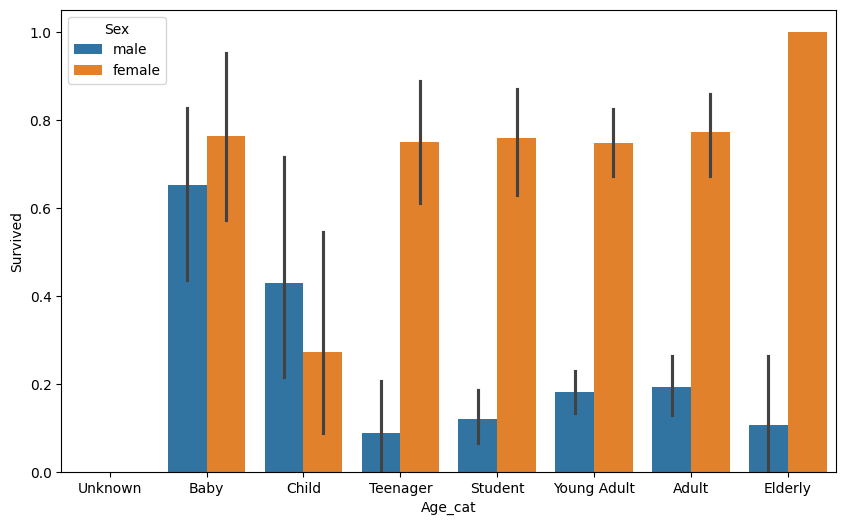

In [22]:
# 입력 age에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lamda 식에 사용
def get_category(age):
  cat=''
  if age <= -1 : cat='Unknown'
  elif age <= 5 : cat = 'Baby'
  elif age <= 12 : cat = 'Child'
  elif age <= 18 : cat = 'Teenager'
  elif age <= 25 : cat = 'Student'
  elif age <= 35 : cat = 'Young Adult'
  elif age <= 60 : cat = 'Adult'
  else : cat = 'Elderly'

  return cat

# 막대 그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10,6))

# x축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

##### 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환하기

In [32]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2


- Null 처리: fillna( )
- 불필요한 피처 제거 : drop( )
- 인코딩 수행

In [41]:
# Null 처리 함수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace = True)
  df['Cabin'].fillna('N', inplace = True)
  df['Embarked'].fillna('N', inplace = True)
  df['Fare'].fillna(0, inplace=True)
  return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature] = le.transform(df[feature])
  return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [42]:
# 원본 데이터를 재로딩하고, 피처 데이터와 레이블 데이터 세트 추출
titanic_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1) # axis=1은 열을 제거한다는 의미

X_titanic_df = transform_features(X_titanic_df)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

- 학습 데이터와 테스트 데이터를 기반으로 머신러닝 모델을 학습하고(fit), 예측하고(predict) 예측성능 평가(accuracy_score)를 할 것.
- DecisionTreeClassifier와 RandomForestClassifier에 생성 인자로 입력된 random_state=11은 예제를 수행할 때마다 같은 결과를 출력하기 위한 용도일
뿐이니 실제 사례에서는 제거해도 무방
- LogisticRegression의 생성 인자로 입력된 solver—iblinear1 는 로지스틱 회귀의 최적화 알고리즘을 liblinear로 설정

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
df_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
df_clf.fit(X_train, y_train)
df_pred = df_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, df_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8659


- 3개의 알고리즘 중 LogisticRegression이 타 알고리즘에 비해 높은 정확도를 나타냄.

##### 교차검증 (ⅰ.사이킷런의 KFold 클래스를 이용해 교차검증, 폴드 개수 5개)

In [45]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  # 폴드 개수를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
  kfold = KFold(n_splits=folds)
  scores = []

  # KFold 교차 검증 수행
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    # X_titanic_df 데이터에서 교차 검증 별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

    # Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

  # 5개 fold에서의 평균 정확도 계산
  mean_score = np.mean(scores)
  print('평균 정확도: {0:.4f}'.format(mean_score))
# exec_kfold 호출
exec_kfold(df_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


- enumerate( )는 파이썬 내장함수로, 반복문에서 인덱스와 값을 함께 반환한다. enumerate()를 사용하면 for 루프에서 반복의 순서와 각 값을 동시에 얻을 수 있다. 예를 들어, 위 코드에서는 첫번째 반복에서 iter_count가 0, 두번째 반복에서는 1이 된다 ..

- X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]

  ➡️ X_titanic_df.values는 데이터프레임을 넘파이 배열 형태로 변환한다. train_index와 test_index는 각각의 폴드에서 학습과 테스트에 사용할 데이터의 인덱스를 가리킨다.
X_train은 X_titanic_df에서 train_index에 해당하는 부분을 추출한 학습 데이터, X_test는 test_index에 해당하는 테스트 데이터다.
  

##### 교차검증 (ⅱ.cross_val_score API를 이용)

In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(df_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도 {1:.4f}'.format(iter_count, accuracy))

print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도 0.7430
교차 검증 1 정확도 0.7753
교차 검증 2 정확도 0.7921
교차 검증 3 정확도 0.7865
교차 검증 4 정확도 0.8427
평균 정확도: 0.7879


##### GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측성능 측정

- CV는 5개의 폴드 세트를 지정하고 하이퍼 파라미터는 max_depth, min_
samples_split, min_samples_leaf를 변경하면서 성능을 측정

In [48]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],
              'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

grid_dclf = GridSearchCV(df_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearch 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf= grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearch 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715


- 하이퍼 파라미터 변경 전보다 약 8% 이상이 증가했는데, 일반적으로 하이퍼 파라미터를 튜닝하더라도 이 정도 수준으로 증가하기는 매우 어렵다. 테스트용 데이터 세트가 작기 때문에 수치상으로 예측 성능이 많이 증가한 것처럼 보인다.

### 🧙🏻‍♀️ 정리

- 사이킷런은 많은 머신러닝 알고리즘을 제공하며, 파이썬 계열의 대표적인 머신러닝 패키지로 자리잡았다.

[머신러닝 애플리케이션]

1. 데이터의  **전처리** 작업
-   Null값 처리
-   필요없는 데이터 제거
-   (레이블/원-핫) 인코딩
-   데이터 스케일링, 정규화 작업

2. 데이터를 학습 데이터와 테스트 데이터로 분리하는 데이터 세트 **분리**

3. 학습 데이터를 기반으로 머신러닝 알고리즘을 적용해 모델 **학습**

4. 학습된 모델을 기반으로 테스트 데이터에 대한 **예측** 수행

5. 예측된 결괏값을 실제 결괏값과 비교해 머신러닝 모델에 대한 **평가** 수행

6. 학습 데이터 세트를 학습 데이터와 검증 데이터로 구성된 여러 개의 폴드 세트로 분리해 **교차 검증** 수행

-  KFold
-   StratifiedKFold
-   cross_val_score( )
-   GridSearchCV (머신러닝 모델의 최적의 하이퍼 파라미터를 교차 검증을 통해 추출하기 위해 GridSearchCV를 제공)

